In [1]:
import numpy as np
from scipy.stats import dirichlet
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [32]:
num_action = 6
num_reward = 10
num_trial = 1000


action_set = [i for i in range(num_action)]

In [48]:
multinommial_param_set = np.array([np.random.uniform(0, 1, num_reward) for i in range(num_action)])
multinommial_param_set = (multinommial_param_set.T / np.sum(multinommial_param_set, axis=1)).T

In [ ]:
base_param_set = np.array([[1/num_reward for i in range(num_reward)] for i in range(num_action)])
print(base_param_set)

In [50]:
oracle_ent = np.sum(multinommial_param_set*np.log(multinommial_param_set/base_param_set), axis=1)

In [51]:
oracle_ent

array([0.22418841, 0.11797305, 0.06080591, 0.26383643, 0.13955008,
       0.32260893])

In [52]:
log_reward = np.zeros((num_action, num_reward))
prior = np.ones(num_reward)
cum_reward_list = []
pull_arm_list = np.zeros(num_action)
pull_arm_list2 = []

for trial in range(num_trial):
    if trial < num_action:
        pull_arm = trial
        
    else:
        action_posterior_set = []
        
        for a in range(num_action):
            posterior_samples = dirichlet.rvs(prior+log_reward[a], size=1)
            posterior_ent = np.sum(posterior_samples*np.log(posterior_samples/base_param_set[a]), axis=1)
            action_posterior_set.append(posterior_ent)
            
            
        pull_arm = np.argmax(action_posterior_set)
    
    reward = np.random.multinomial(1, multinommial_param_set[pull_arm])
    log_reward[pull_arm, np.where(reward == 1)] += 1
    
    cum_reward_list.append(oracle_ent[pull_arm])
    pull_arm_list[pull_arm] += 1
    pull_arm_list2.append(pull_arm)

In [53]:
pull_arm_list

array([123.,  59.,  28., 387.,  41., 362.])

(array([123.,   0.,  59.,   0.,  28.,   0., 387.,   0.,  41., 362.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

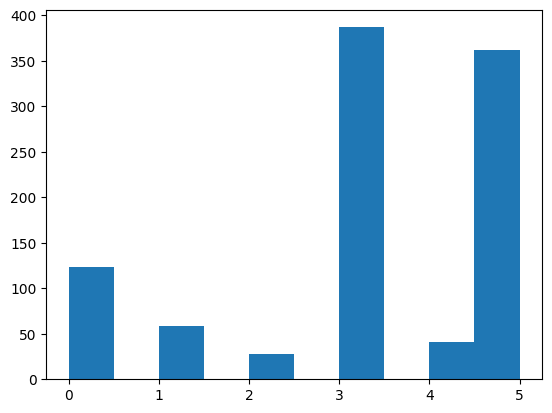

In [54]:
plt.hist(pull_arm_list2)